<a href="https://colab.research.google.com/github/Saransh-khandelwal-123/Saransh-khandelwal-123/blob/main/Cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Applying AI to Help people improve their lifestyle**	

## **Description**
Age-related diseases are killing 150,000 people per day. Humanity is a health tech organization, which is now able to monitor people’s rates of aging, but the only way for that information to have an impact is if the people can know what actions they should take to slow their aging down. This is complex because these impactful actions will not only be different for every person, but also for every moment in that person’s life, and for every combination of actions the person takes.
The basic idea behind biological aging is that aging occurs as you gradually accumulate damage and lose function in various tissues and systems in the body. Biological age can vary quite a bit depending on your lifestyle (diet, exercise, sleep, attitude, stress, etc.). Depending on your genetics and your lifestyle actions, your biological age will be higher or lower than your chronological one. People with a younger biological age compared to their chronological age are at a lower risk of suffering age-related diseases and mortality.

### **Technologies & Tools:**	Machine Learning, Python

**Cardiovascular Disease**

Heart disease is the number one killer in the United States, and among the leading causes of death in many other countries.1

The most common form is coronary artery disease, which involves a narrowing or blockage of the main arteries supplying the heart with blood. Obstructions can develop over time, or quickly—as in an acute rupture—and cause potentially fatal heart attacks.So, it's necessary to treat well on time.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("/content/cardio_train.csv",sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Features

**id** => It's just the Id no of the row. *Not revelant*

**age** => It's the age of a person in Days

**gender** => It's the gender of the person.

**height** => It's the height of the person in cm

**weight** => It's the weight of the person in kg

**ap_hi**=> It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below

**ap_low** => It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value : 80mmhg or Below

**cholesterol** :> It's the Cholestreol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High

**gluc** => It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL

**smoke** => It contain Binary Values stating whether Person is a Smoker or not i.e. {0 : 'Not a Smoker', 1 : 'Smoker'}

**alco** => It contain Binary Values stating whether Person is an alchoalic or not i.e. {0 : 'Not a Alcholic', 1 : 'Alcholic'}

**active** => It contain Binary Values stating whether Person is involved in physical activites or not i.e. {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'}

**cardio** => It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e. {0 : 'Not Have CVD', 1 : 'Have CVD'}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [14]:
df.shape

(70000, 13)

In [15]:
df.drop(columns=["id"],inplace=True)
df.head(3)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1


Finding co-relation for better understanding the trends.

In [16]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [17]:
import seaborn as sns

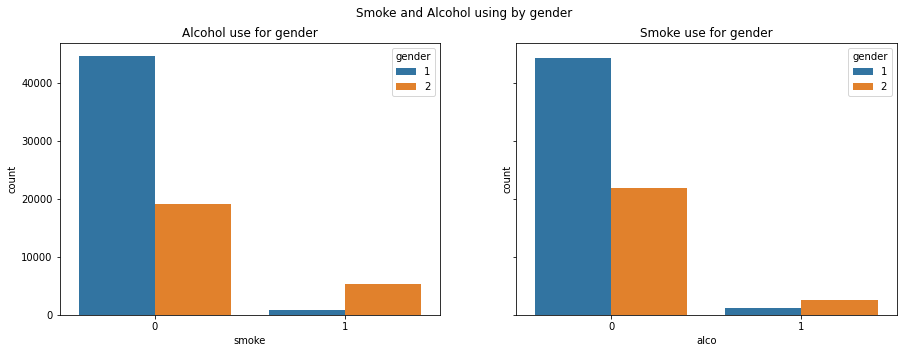

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')


sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender)
axes[1].set_title("Smoke use for gender")


sns.countplot(ax=axes[1], x=df.alco,hue=df.gender)
axes[0].set_title("Alcohol use for gender")
plt.show()


**We know that men are more indulged in smoke and alcohol rather than women**
So, Gender: 1 must be men

In [19]:
df.drop(columns=["ap_hi","ap_lo","active"],inplace=True)
df.head(3)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,cardio
0,18393,2,168,62.0,1,1,0,0,0
1,20228,1,156,85.0,3,1,0,0,1
2,18857,1,165,64.0,3,1,0,0,1


In [20]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke',
       'alco', 'cardio'],
      dtype='object')

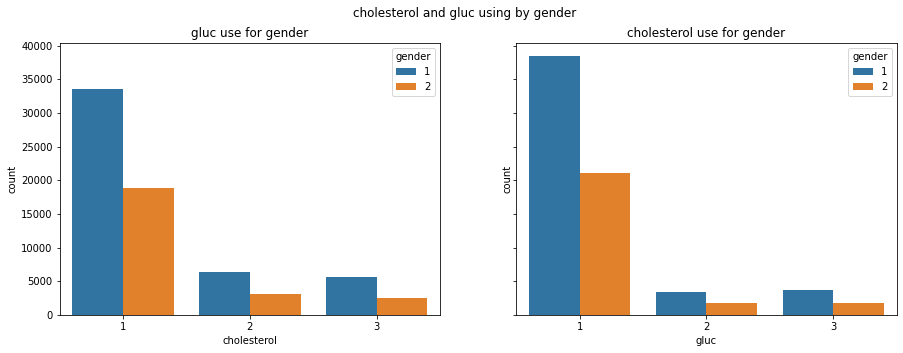

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('cholesterol and gluc using by gender')


sns.countplot(ax=axes[0], x=df.cholesterol,hue=df.gender)
axes[1].set_title("cholesterol use for gender")


sns.countplot(ax=axes[1], x=df.gluc,hue=df.gender)
axes[0].set_title("gluc use for gender")
plt.show()

In [22]:
x=df.drop(['cardio'],axis=1)

In [23]:
x

,age,gender,height,weight,cholesterol,gluc,smoke,alco
0,18393,2,168,62.0,1,1,0,0
1,20228,1,156,85.0,3,1,0,0
2,18857,1,165,64.0,3,1,0,0
3,17623,2,169,82.0,1,1,0,0
4,17474,1,156,56.0,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,1,1,1,0
69996,22601,1,158,126.0,2,2,0,0
69997,19066,2,183,105.0,3,1,0,1
69998,22431,1,163,72.0,1,2,0,0


In [24]:
y=df['cardio']

In [25]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

# **Model Selection**

## **Random Forest Classification**

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1263)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [29]:
rfc.predict(xtest)

array([1, 0, 0, ..., 1, 0, 0])

In [31]:
rfc.score(xtest,ytest)

0.6031904761904762

## **Random Forest Regression**

In [39]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(n_estimators=200, random_state=0)

In [40]:
regressor.predict(xtest)


array([0.845, 0.175, 0.85 , ..., 0.885, 0.185, 0.01 ])

In [41]:
regressor.score(xtest,ytest)

0.8632689432596742

## **K-neighbor classifier**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [44]:
knc.predict(xtest)

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
knc.score(xtest,ytest)

0.5753333333333334

FROM THESE THREE MODELS WE CAN INFER THAT Random Forest Regression MODEL GIVES THE BEST ACCURACY AMONG ALL THESE.